In [34]:
#Import pandas for dataframes as pd
import pandas as pd

#Import datetime module for manipulating dates and times as dt
import datetime as dt

#Import request to allow for connections to APIs
import requests

#Import json package
import json

#Import matplotlib and seaborn for visualisations
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Obtaining data from clinicaltrials.gov API (in two parts due to API restrictions)
url_1 = 'https://clinicaltrials.gov/api/query/study_fields?expr=AREA[StudyType]Interventional+AREA[OverallStatus]Completed+AREA[HealthyVolunteers]No+AREA[PrimaryCompletionDate]RANGE[01/01/2013,%20MAX]&min_rnk=1&max_rnk=1000&fmt=JSON&fields=NCTId,BriefTitle,Condition,ArmGroupInterventionName,LeadSponsorName,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate'
url_2 = 'https://clinicaltrials.gov/api/query/study_fields?expr=AREA[StudyType]Interventional+AREA[OverallStatus]Completed+AREA[HealthyVolunteers]No+AREA[PrimaryCompletionDate]RANGE[01/01/2013,%20MAX]&min_rnk=1001&max_rnk=2000&fmt=JSON&fields=NCTId,BriefTitle,Condition,ArmGroupInterventionName,LeadSponsorName,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate'
r_1 = requests.get(url_1)
r_2 = requests.get(url_2)
json_data_1 = r_1.json()
json_data_2 = r_2.json()

In [3]:
#Checking format and keys of imported data above
print(type(json_data_1))
print(json_data_1.keys())

<class 'dict'>
dict_keys(['StudyFieldsResponse'])


In [4]:
#Further investigating structure of imported data 
print(type(json_data_1['StudyFieldsResponse']))
print(json_data_1['StudyFieldsResponse'].keys())

<class 'dict'>
dict_keys(['APIVrs', 'DataVrs', 'Expression', 'NStudiesAvail', 'NStudiesFound', 'MinRank', 'MaxRank', 'NStudiesReturned', 'FieldList', 'StudyFields'])


In [5]:
#Investigating data important under 'StudyFields' in imported data and printing first row.
print(type(json_data_1['StudyFieldsResponse']['StudyFields']))
print(json_data_1['StudyFieldsResponse']['StudyFields'][0])

<class 'list'>
{'Rank': 1, 'NCTId': ['NCT05919732'], 'BriefTitle': ['Awake Caudal Catheter Infusion Versus General Anesthesia'], 'Condition': ['Inguinal Hernia'], 'ArmGroupInterventionName': ['Drug: Bupivacaine and epinephrine infusion', 'Drug: Bupivacaine and epinephrine infusion'], 'LeadSponsorName': ["Nemours Children's Clinic"], 'LeadSponsorClass': ['OTHER'], 'EnrollmentCount': ['40'], 'StartDate': ['March 8, 2016'], 'PrimaryCompletionDate': ['March 8, 2018']}


In [6]:
#Append the two imported datasets, i.e. the lists located under 'StudyFields' key in json_data_1 and json_data_2.
trials = json_data_1['StudyFieldsResponse']['StudyFields'] + json_data_2['StudyFieldsResponse']['StudyFields']
print(trials[0])
print(trials[-1])

{'Rank': 1, 'NCTId': ['NCT05919732'], 'BriefTitle': ['Awake Caudal Catheter Infusion Versus General Anesthesia'], 'Condition': ['Inguinal Hernia'], 'ArmGroupInterventionName': ['Drug: Bupivacaine and epinephrine infusion', 'Drug: Bupivacaine and epinephrine infusion'], 'LeadSponsorName': ["Nemours Children's Clinic"], 'LeadSponsorClass': ['OTHER'], 'EnrollmentCount': ['40'], 'StartDate': ['March 8, 2016'], 'PrimaryCompletionDate': ['March 8, 2018']}
{'Rank': 2000, 'NCTId': ['NCT05408585'], 'BriefTitle': ['MEC90 for Supra-inguinal Fascia Iliaca Block Performed Under Ultrasound Guidance in Arthroscopic Knee Surgery'], 'Condition': ['Pain Management'], 'ArmGroupInterventionName': ['Other: Regional Anesthesia Techniques', 'Other: Regional Anesthesia Techniques'], 'LeadSponsorName': ['Samsun University'], 'LeadSponsorClass': ['OTHER'], 'EnrollmentCount': ['65'], 'StartDate': ['June 7, 2022'], 'PrimaryCompletionDate': ['February 27, 2023']}


In [7]:
#Creating a dataframe to work with.
trials_df = pd.DataFrame(trials)

# Exploring and Cleaning the DataFrame

In [8]:
#Look at first 5 rows of data to get a better sense of the dataset.
trials_df.head()

,Rank,NCTId,BriefTitle,Condition,ArmGroupInterventionName,LeadSponsorName,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate
0,1,[NCT05919732],[Awake Caudal Catheter Infusion Versus General...,[Inguinal Hernia],"[Drug: Bupivacaine and epinephrine infusion, D...",[Nemours Children's Clinic],[OTHER],[40],"[March 8, 2016]","[March 8, 2018]"
1,2,[NCT05919706],[Mobile Technology and Motivational Interviewi...,"[Type 2 Diabetes Mellitus, Gaming, Motivationa...",[Behavioral: Patient Education with Game-Based...,[Inonu University],[OTHER],[64],"[October 6, 2022]","[February 3, 2023]"
2,3,[NCT05919186],[Effects of Antioxidant Supplementation of Cul...,"[Infertility, Female, Infertility, Male]","[Drug: EmbryORP®, Device: O2 tension 20%, Drug...",[Liliana Berenice Ramírez Domínguez],[INDUSTRY],[293],"[October 12, 2021]","[April 12, 2022]"
3,4,[NCT05918731],[Self-management in Chronic Obstructive Pulmon...,[Chronic Obstructive Pulmonary Disease],[Behavioral: Self Management],[University of Crete],[OTHER],[120],"[April 1, 2020]","[August 30, 2020]"
4,5,[NCT05918224],[Streptococcus Salivarius K12 for Prevention a...,[Head and Neck Squamous Cell Carcinoma],"[Drug: Streptococcus salivarius K12, Drug: Str...",[West China Hospital],[OTHER],[160],"[January 1, 2022]","[November 30, 2022]"


In [9]:
#Dropping the rank column as this is of no interest.
trials_df.drop('Rank', inplace=True, axis=1)
trials_df.head()

,NCTId,BriefTitle,Condition,ArmGroupInterventionName,LeadSponsorName,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate
0,[NCT05919732],[Awake Caudal Catheter Infusion Versus General...,[Inguinal Hernia],"[Drug: Bupivacaine and epinephrine infusion, D...",[Nemours Children's Clinic],[OTHER],[40],"[March 8, 2016]","[March 8, 2018]"
1,[NCT05919706],[Mobile Technology and Motivational Interviewi...,"[Type 2 Diabetes Mellitus, Gaming, Motivationa...",[Behavioral: Patient Education with Game-Based...,[Inonu University],[OTHER],[64],"[October 6, 2022]","[February 3, 2023]"
2,[NCT05919186],[Effects of Antioxidant Supplementation of Cul...,"[Infertility, Female, Infertility, Male]","[Drug: EmbryORP®, Device: O2 tension 20%, Drug...",[Liliana Berenice Ramírez Domínguez],[INDUSTRY],[293],"[October 12, 2021]","[April 12, 2022]"
3,[NCT05918731],[Self-management in Chronic Obstructive Pulmon...,[Chronic Obstructive Pulmonary Disease],[Behavioral: Self Management],[University of Crete],[OTHER],[120],"[April 1, 2020]","[August 30, 2020]"
4,[NCT05918224],[Streptococcus Salivarius K12 for Prevention a...,[Head and Neck Squamous Cell Carcinoma],"[Drug: Streptococcus salivarius K12, Drug: Str...",[West China Hospital],[OTHER],[160],"[January 1, 2022]","[November 30, 2022]"


In [10]:
#Finding out number of data entries, columns, data types, and assessing quality of dataset (no. blank cells)
trials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NCTId                     2000 non-null   object
 1   BriefTitle                2000 non-null   object
 2   Condition                 2000 non-null   object
 3   ArmGroupInterventionName  2000 non-null   object
 4   LeadSponsorName           2000 non-null   object
 5   LeadSponsorClass          2000 non-null   object
 6   EnrollmentCount           2000 non-null   object
 7   StartDate                 2000 non-null   object
 8   PrimaryCompletionDate     2000 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


In [11]:
#Confirming that there is no missing data. 
trials_df.isna().any()

NCTId                       False
BriefTitle                  False
Condition                   False
ArmGroupInterventionName    False
LeadSponsorName             False
LeadSponsorClass            False
EnrollmentCount             False
StartDate                   False
PrimaryCompletionDate       False
dtype: bool

In [12]:
#Function that can be called to clean up the string objects in a dataframe by removing unnwanted characters.
def clean_df_strings(self, *col_name):
    for name in col_name:
        self[name] = self[name].astype('string')
        self[name] = self[name].str.replace("[","", regex=True).str.replace("]","", regex=True).str.strip("'")

In [13]:
#Removing unwanted characters from trials_df strings.
clean_df_strings(trials_df, "NCTId", "BriefTitle", "Condition", "ArmGroupInterventionName", "LeadSponsorName", "LeadSponsorClass", "EnrollmentCount", "StartDate", "PrimaryCompletionDate")
trials_df.head()

,NCTId,BriefTitle,Condition,ArmGroupInterventionName,LeadSponsorName,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate
0,NCT05919732,Awake Caudal Catheter Infusion Versus General ...,Inguinal Hernia,"Drug: Bupivacaine and epinephrine infusion', '...","""Nemours Children's Clinic""",OTHER,40,"March 8, 2016","March 8, 2018"
1,NCT05919706,Mobile Technology and Motivational Interviewin...,"Type 2 Diabetes Mellitus', 'Gaming', 'Motivati...",Behavioral: Patient Education with Game-Based ...,Inonu University,OTHER,64,"October 6, 2022","February 3, 2023"
2,NCT05919186,Effects of Antioxidant Supplementation of Cult...,"Infertility, Female', 'Infertility, Male","Drug: EmbryORP®', 'Device: O2 tension 20%', 'D...",Liliana Berenice Ramírez Domínguez,INDUSTRY,293,"October 12, 2021","April 12, 2022"
3,NCT05918731,Self-management in Chronic Obstructive Pulmona...,Chronic Obstructive Pulmonary Disease,Behavioral: Self Management,University of Crete,OTHER,120,"April 1, 2020","August 30, 2020"
4,NCT05918224,Streptococcus Salivarius K12 for Prevention an...,Head and Neck Squamous Cell Carcinoma,"Drug: Streptococcus salivarius K12', 'Drug: St...",West China Hospital,OTHER,160,"January 1, 2022","November 30, 2022"


In [14]:
#Converting Enrollment to an integer and checking the type.
trials_df['EnrollmentCount'] = trials_df['EnrollmentCount'].astype(int)
trials_df.dtypes

NCTId                       string
BriefTitle                  string
Condition                   string
ArmGroupInterventionName    string
LeadSponsorName             string
LeadSponsorClass            string
EnrollmentCount              int32
StartDate                   string
PrimaryCompletionDate       string
dtype: object

In [15]:
#Having seen the start and completion dates are not datetime, I want to convert now.
trials_df["StartDate"] = pd.to_datetime(trials_df["StartDate"])
trials_df["PrimaryCompletionDate"] = pd.to_datetime(trials_df["PrimaryCompletionDate"])
print(trials_df.dtypes)

NCTId                               string
BriefTitle                          string
Condition                           string
ArmGroupInterventionName            string
LeadSponsorName                     string
LeadSponsorClass                    string
EnrollmentCount                      int32
StartDate                   datetime64[ns]
PrimaryCompletionDate       datetime64[ns]
dtype: object


In [16]:
#Adding column to capture length of the study as number of days.
trials_df["StudyLength"] = (trials_df["PrimaryCompletionDate"] - trials_df["StartDate"]).dt.days

,NCTId,BriefTitle,Condition,ArmGroupInterventionName,LeadSponsorName,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate,StudyLength
0,NCT05919732,Awake Caudal Catheter Infusion Versus General ...,Inguinal Hernia,"Drug: Bupivacaine and epinephrine infusion', '...","""Nemours Children's Clinic""",OTHER,40,2016-03-08,2018-03-08,730
1,NCT05919706,Mobile Technology and Motivational Interviewin...,"Type 2 Diabetes Mellitus', 'Gaming', 'Motivati...",Behavioral: Patient Education with Game-Based ...,Inonu University,OTHER,64,2022-10-06,2023-02-03,120
2,NCT05919186,Effects of Antioxidant Supplementation of Cult...,"Infertility, Female', 'Infertility, Male","Drug: EmbryORP®', 'Device: O2 tension 20%', 'D...",Liliana Berenice Ramírez Domínguez,INDUSTRY,293,2021-10-12,2022-04-12,182
3,NCT05918731,Self-management in Chronic Obstructive Pulmona...,Chronic Obstructive Pulmonary Disease,Behavioral: Self Management,University of Crete,OTHER,120,2020-04-01,2020-08-30,151
4,NCT05918224,Streptococcus Salivarius K12 for Prevention an...,Head and Neck Squamous Cell Carcinoma,"Drug: Streptococcus salivarius K12', 'Drug: St...",West China Hospital,OTHER,160,2022-01-01,2022-11-30,333


In [17]:
#Sorting the dataframe by the length of the study.
trials_df = trials_df.sort_values(by="StudyLength")
trials_df.head()

,NCTId,BriefTitle,Condition,ArmGroupInterventionName,LeadSponsorName,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate,StudyLength
1553,NCT05490316,A Study of IBI353 (Orismilast) in Chinese Heal...,Healthy Subjects,"Drug: placebo', 'Drug: IBI353 (Orismilast)', '...",Innovent Biologics (Suzhou) Co. Ltd.,INDUSTRY,20,2022-11-30,2022-11-30,0
1807,NCT05444985,Postoperative Analgesic Effects of Bilateral E...,"Analgesia', 'Pain, Postoperative","Other: Pain Management', 'Other: Pain Management",Samsun University,OTHER,80,2023-05-09,2023-05-09,0
810,NCT05674045,"A Phase 2, Randomized, Placebo-controlled, Dou...",Stress Urinary Incontinence,"Drug: EG017 3mg', 'Drug: EG017 6mg', 'Drug: EG...","GeneScience Pharmaceuticals Co., Ltd.",INDUSTRY,51,2022-01-06,2022-01-06,0
611,NCT05725551,"The Effect of Shotblocker, Finger Puppet And B...",Children,"Device: ShotBlocker', 'Other: Finger Puppet gr...",Mersin University,OTHER,148,2022-10-01,2022-10-01,0
687,NCT05706090,Effect of Neurostimulator Usage on Block Success,PATIENTS WITH UPPER EXTREMITY SURGERY,"Drug: fentanyl will be added', 'Procedure: gen...",Gaziosmanpasa Research and Education Hospital,OTHER_GOV,60,2020-02-01,2020-02-01,0


# Descriptive Statistics

## Quantitative Variables

In [18]:
#Descriptive statistics for EnrollmentCount and StudyLength (Rank not of interest).
trials_df.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,EnrollmentCount,StudyLength
count,2000.000000,2000.000000
mean,531.640000,414.238500
std,8379.036782,487.880553
min,1.000000,0.000000
5%,12.000000,31.000000
25%,30.000000,121.000000
50%,58.000000,242.000000
75%,94.250000,501.000000
95%,301.200000,1329.000000
max,262085.000000,4473.000000


In [30]:
#Getting modes of numerical variables
print(f"EnrollmentCount Mode: {trials_df['EnrollmentCount'].mode()}")
print(f"StudyLength Mode: {trials_df['StudyLength'].mode()}")

EnrollmentCount Mode: 0    60
Name: EnrollmentCount, dtype: int32
StudyLength Mode: 0    365
Name: StudyLength, dtype: int64


In [56]:
#Removing extremes from dataset, i.e. those above the 95% interval and below the 5% interval.
trials_df.drop(trials_df[(trials_df["EnrollmentCount"] >301.2) | (trials_df["EnrollmentCount"] <12)].index, inplace=True)
trials_df.drop(trials_df[(trials_df["StudyLength"] >4473) | (trials_df["StudyLength"] <31)].index, inplace=True)
trials_df.describe()

,EnrollmentCount,StudyLength
count,938.000000,938.000000
mean,64.356077,150.275053
std,47.339766,70.960291
min,12.000000,31.000000
25%,32.000000,90.250000
50%,52.000000,151.000000
75%,80.000000,205.000000
max,300.000000,301.000000


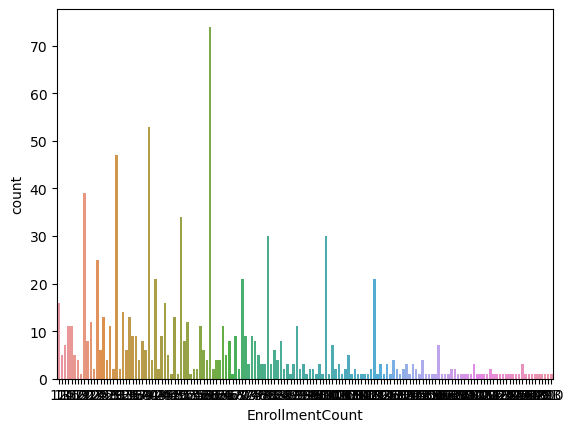

In [57]:
sns.countplot(x=trials_df["EnrollmentCount"])
plt.show()

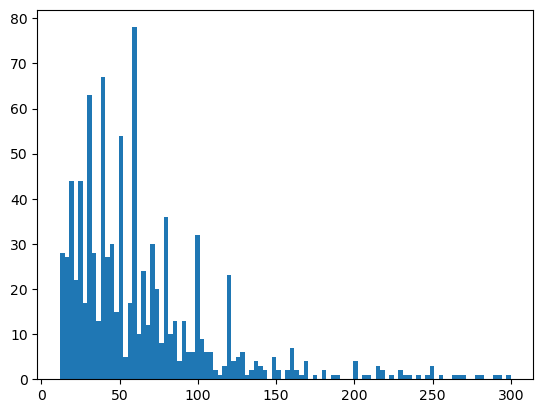

In [58]:
fig, ax = plt.subplots()
ax.hist(trials_df["EnrollmentCount"], bins=100)
plt.show()

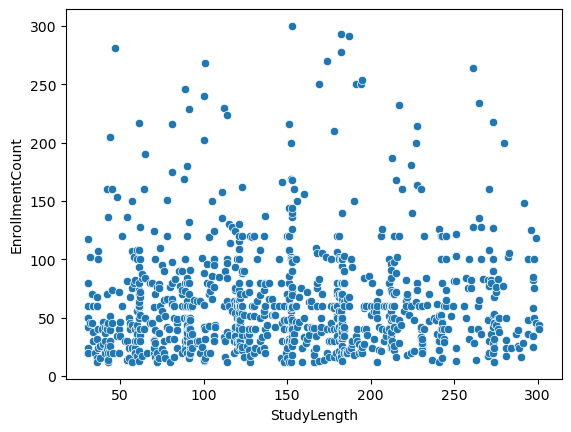

In [59]:
sns.scatterplot(x=trials_df["StudyLength"], y=trials_df["EnrollmentCount"])
plt.show()

## Categorical Variables

In [20]:
trials_df["LeadSponsorClass"].value_counts()

OTHER        1669
INDUSTRY      234
OTHER_GOV      82
NETWORK        10
NIH             3
INDIV           2
Name: LeadSponsorClass, dtype: Int64

In [21]:
trials_df["Condition"].value_counts()

COVID-19                                             24
Stroke                                               16
Knee Osteoarthritis                                  16
Neck Pain                                            12
Obesity                                              11
                                                     ..
Stroke', 'Rehabilitation', 'Mindfulness               1
Penile Cancer', 'Lymph Node Metastasis', 'Sent...     1
Chronic Prostatitis                                   1
GINGIVAL RECESSION                                    1
Calculus; Gallbladder, With Cholecystitis             1
Name: Condition, Length: 1601, dtype: Int64

In [22]:
trials_df["LeadSponsorName"].value_counts()

Riphah International University                      66
Cairo University                                     52
Ain Shams University                                 26
Alexandria University                                21
Zagazig University                                   17
                                                     ..
Taizhou Hospital of Zhejiang Province affiliat...     1
Amsterdam UMC, location VUmc                          1
Afyonkarahisar Health Sciences University             1
Arkansas Heart Hospital                               1
MED-EL Elektromedizinische Geräte GesmbH              1
Name: LeadSponsorName, Length: 1121, dtype: Int64

In [23]:
#could assign above to variables/arrays and complete further operations.

In [24]:
#df.sort_values("study_length") and df.sort_values("study_length", ascedning=False) for descending values
#sort by mutliple values here, study length and number enrolled. df.sort_values(["study_length", "enrollment"])
#can subset columns by saying df["columnName"] or multiple columns via df[["columnName1", "columnName2"]] May want to do this to create a new df ad remove irrelevant columns
#can subset rows with a condition like df[df["enrollment"] > 50] or df[df["condition"] == "cancer"] to see if any additional information of interest